In [1]:
!pip install plot_metric

import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix
from plot_metric.functions import BinaryClassification

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

sns.set()

In [2]:
employee_attrition_data = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
employee_attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

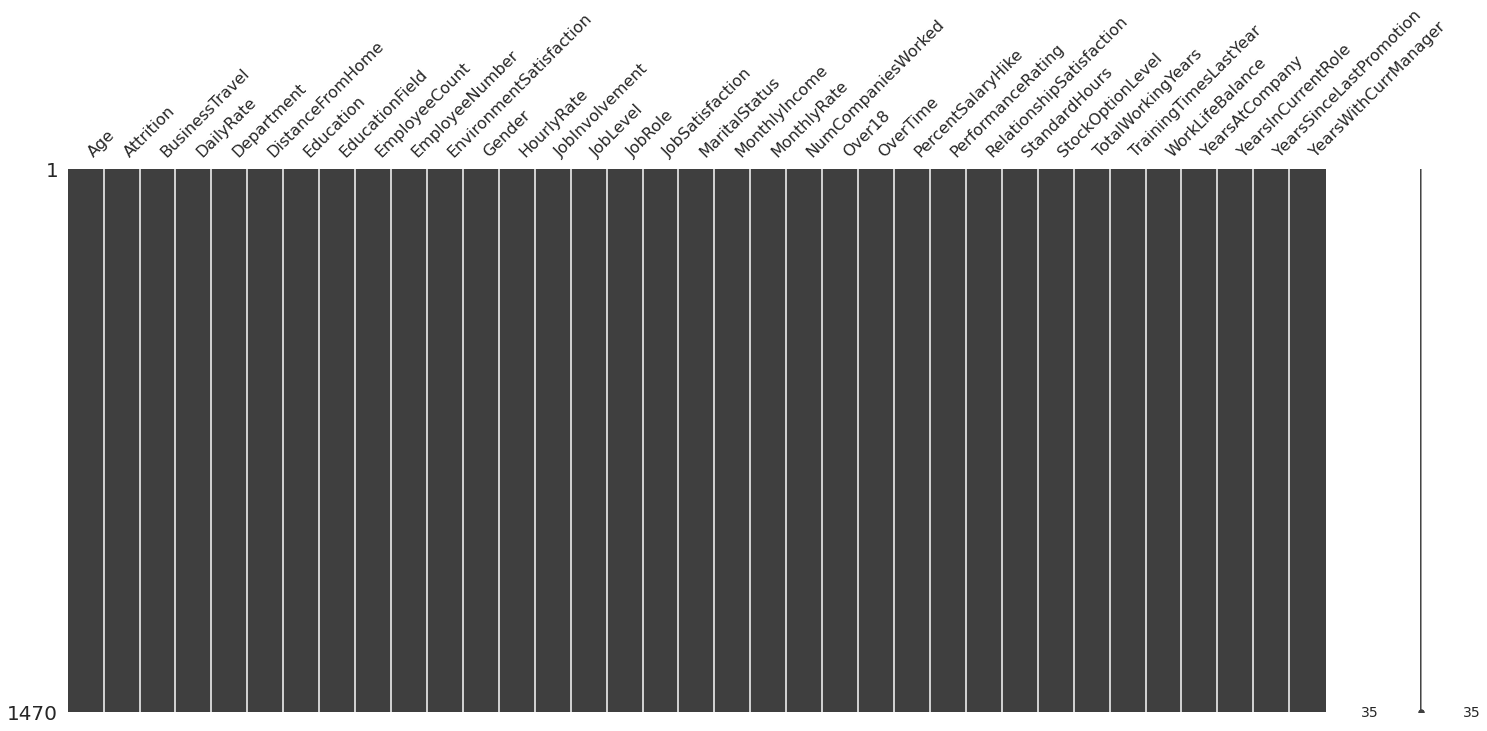

In [4]:
msno.matrix(employee_attrition_data)

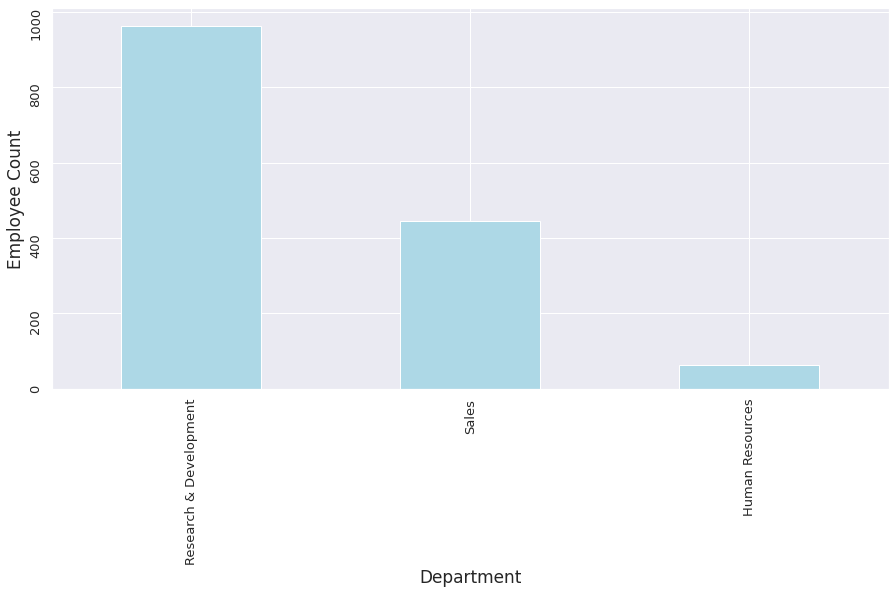

In [5]:
plt.rcParams["figure.figsize"] = (15,7)
employee_attrition_data['Department'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Department',fontsize=17)
plt.ylabel('Employee Count', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.show()

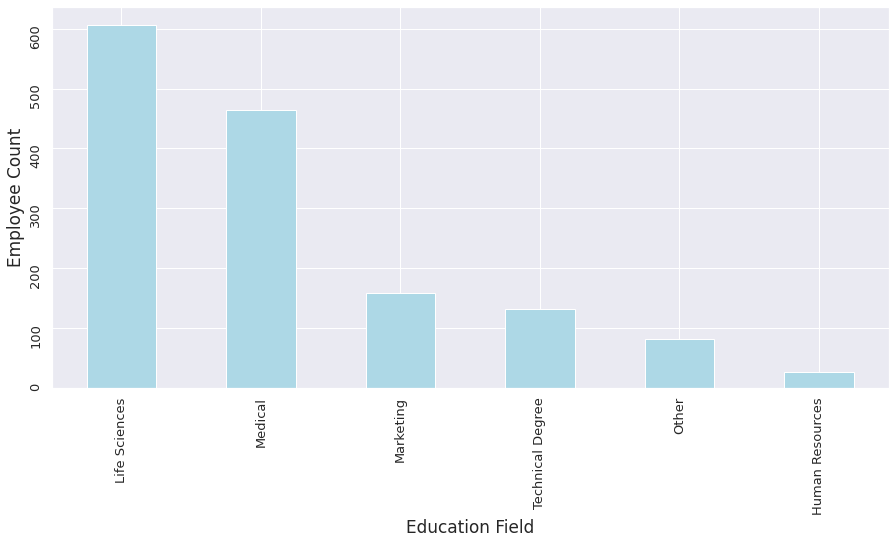

In [6]:
employee_attrition_data['EducationField'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Education Field',fontsize=17)
plt.ylabel('Employee Count', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.show()

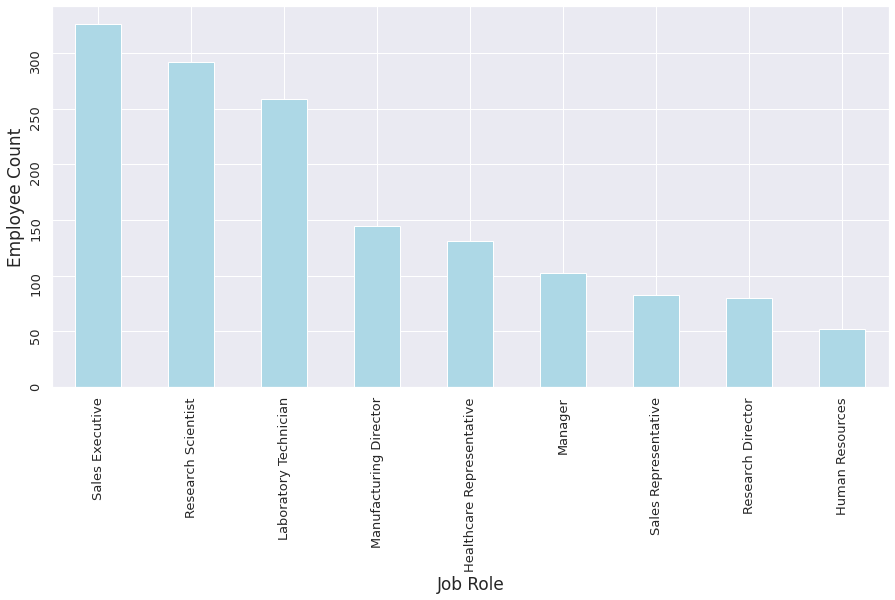

In [7]:
employee_attrition_data['JobRole'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Employee Count', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.show()

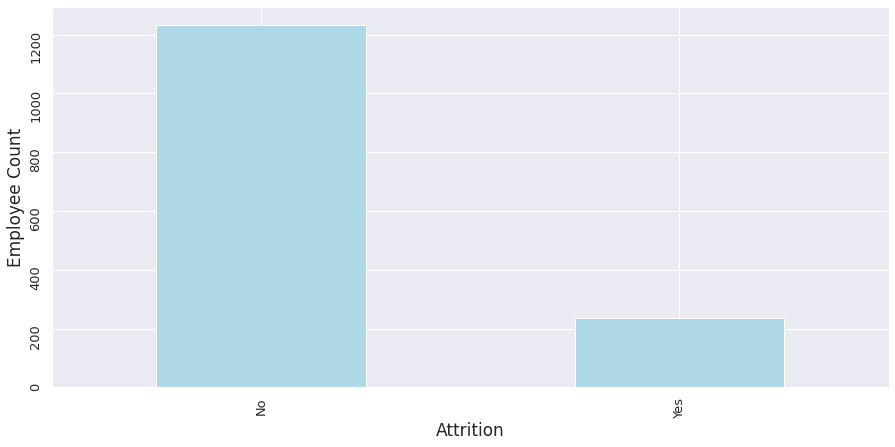

In [8]:
employee_attrition_data['Attrition'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Attrition',fontsize=17)
plt.ylabel('Employee Count', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.show()

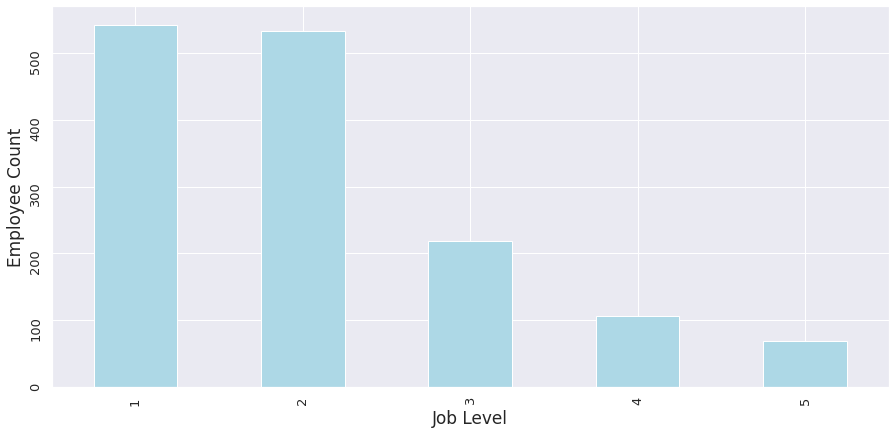

In [9]:
employee_attrition_data['JobLevel'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Job Level',fontsize=17)
plt.ylabel('Employee Count', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.show()

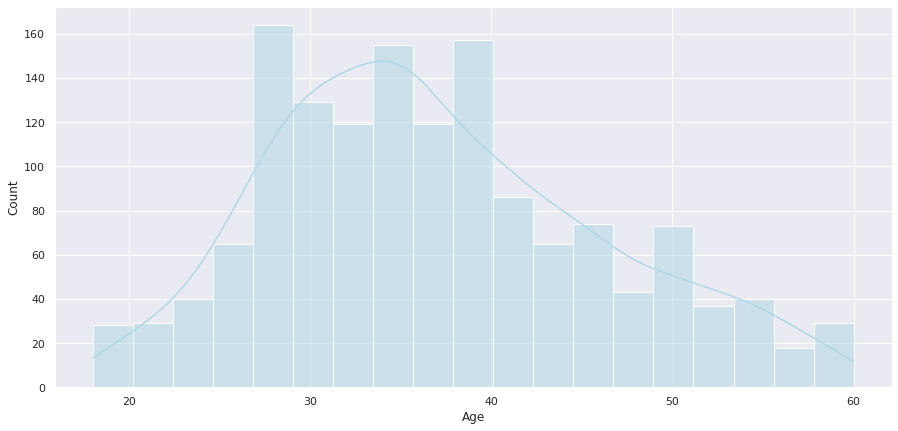

In [10]:
sns.histplot(employee_attrition_data, x=employee_attrition_data["Age"], kde=True, color = '#ADD8E6')
plt.show()

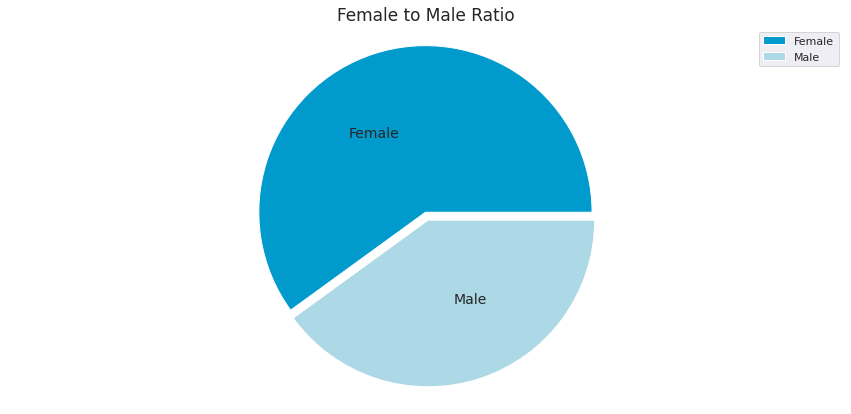

In [11]:
fig, ax = plt.subplots()
labels = ['Female', 'Male']
color_palette_list = ['#009ACD', '#ADD8E6']

percentage = employee_attrition_data['Gender'].value_counts(normalize=True)*100

explode=(0.05,0)
ax.pie(percentage, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], 
       shadow=False, startangle=0,labeldistance=0.5,
       textprops={'fontsize': 14})
ax.axis('equal')
ax.set_title("Female to Male Ratio", fontsize = 17)
ax.legend(bbox_to_anchor=(1, 1));

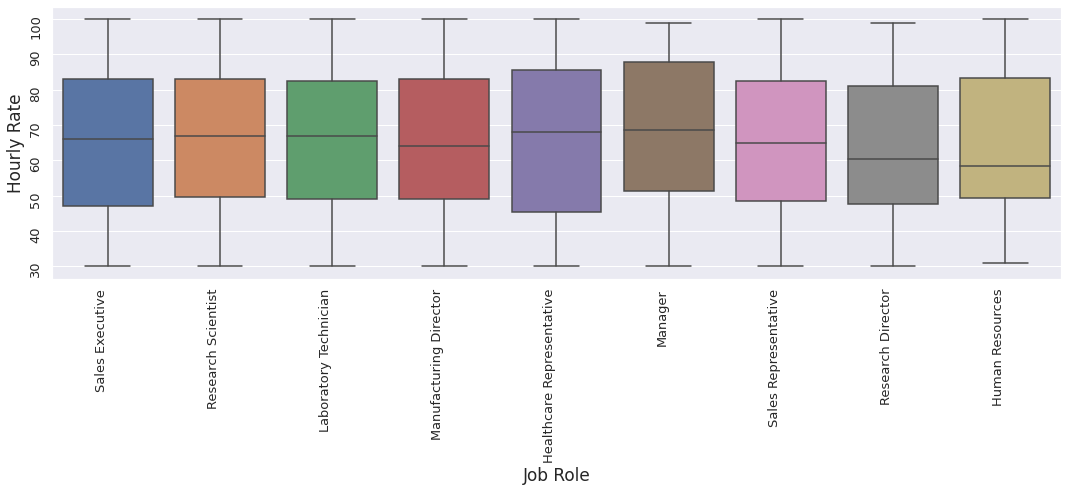

In [12]:
ax = sns.boxplot(y=employee_attrition_data["HourlyRate"], x= employee_attrition_data["JobRole"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Hourly Rate', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.tight_layout()
plt.show()

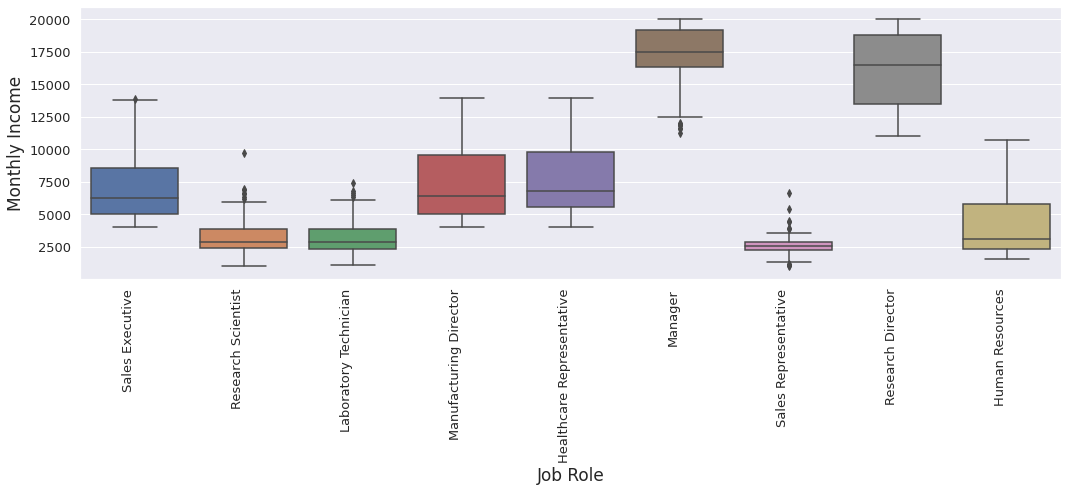

In [13]:
ax = sns.boxplot(y=employee_attrition_data["MonthlyIncome"], x= employee_attrition_data["JobRole"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Monthly Income', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=0)
plt.tight_layout()
plt.show()

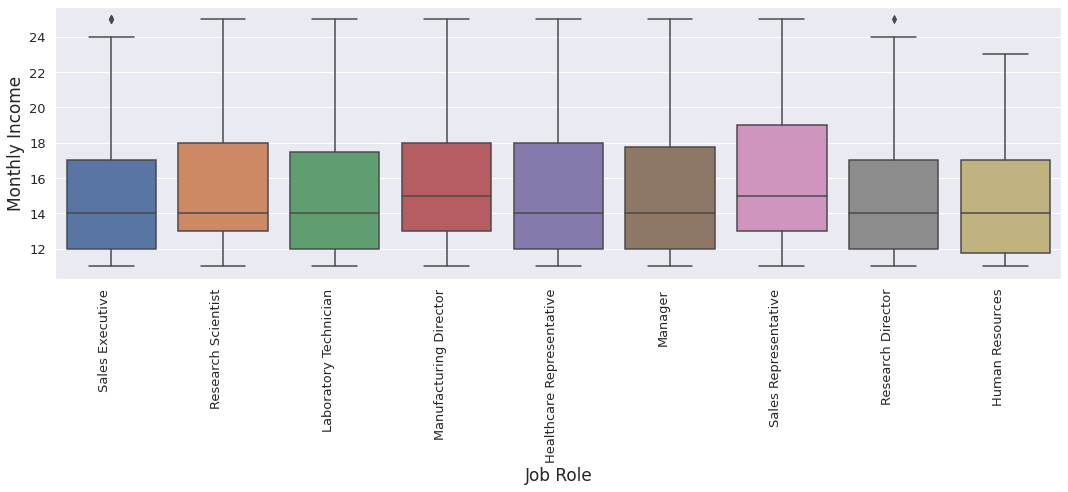

In [14]:
ax = sns.boxplot(y=employee_attrition_data["PercentSalaryHike"], x= employee_attrition_data["JobRole"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Monthly Income', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=0)
plt.tight_layout()
plt.show()

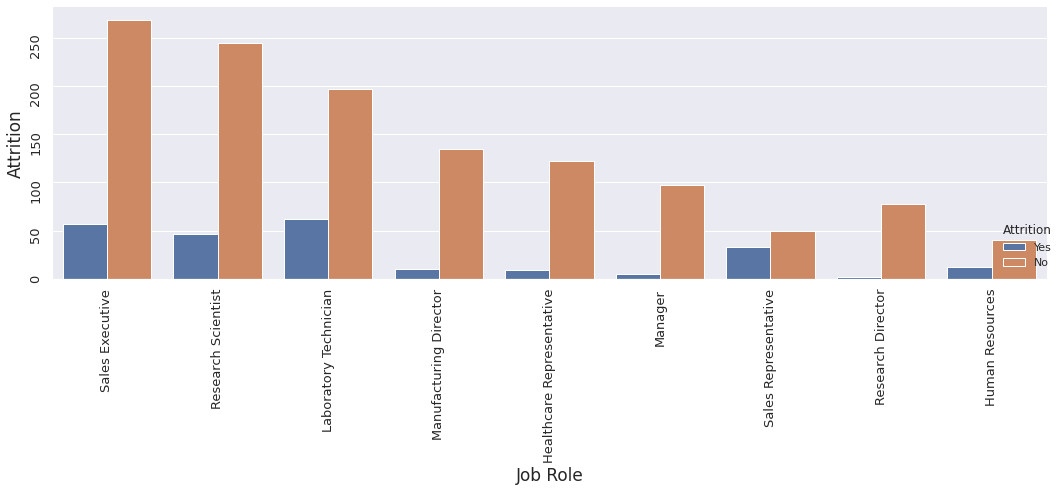

In [15]:
plt.rcParams["figure.figsize"] = (15,7)
sns.catplot(x='JobRole', hue='Attrition', data=employee_attrition_data, kind="count", height=7, aspect=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="left")
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Attrition', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.tight_layout()
plt.show()

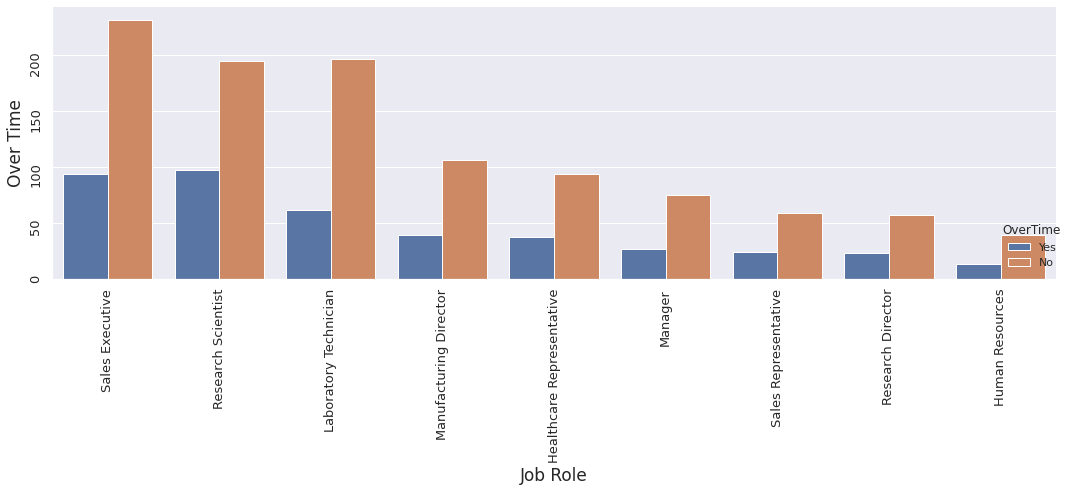

In [16]:
plt.rcParams["figure.figsize"] = (15,7)
sns.catplot(x='JobRole', hue='OverTime', data=employee_attrition_data, kind="count", height=7, aspect=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="left")
plt.xlabel('Job Role',fontsize=17)
plt.ylabel('Over Time', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13, rotation=90)
plt.tight_layout()
plt.show()

In [17]:
employee_attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [18]:
for col in employee_attrition_data.columns:
    if employee_attrition_data[col].dtype == 'object':
        employee_attrition_data[col]= employee_attrition_data[col].astype('category')
        employee_attrition_data[col] = employee_attrition_data[col].cat.codes

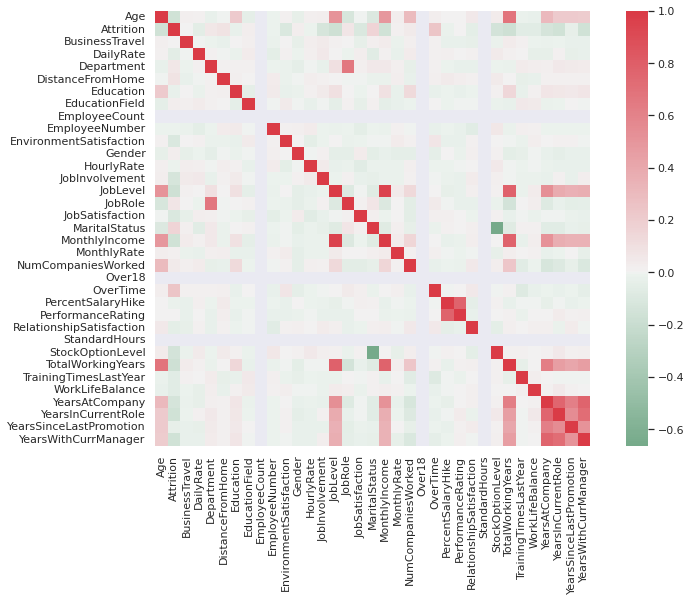

In [19]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

plt.figure(figsize=(13,8))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(employee_attrition_data.corr(), cmap =cmap, center=0, annot=False, square=True);

In [20]:
X = employee_attrition_data.drop('Attrition',axis=1)
y = employee_attrition_data['Attrition']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# SMOTE

In [22]:
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

# Random Forest

In [23]:
classifier = RandomForestClassifier(random_state=90, oob_score=True)
classifier.fit(X, y)

print(classifier.oob_score_)

0.8564625850340136


In [24]:
params = {
        'max_depth': [14, 25, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 3, 5, 6],
        'min_samples_leaf': [2, 3, 5, 6],
        'n_estimators': [10, 20, 50, 70, 100]
}

In [25]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=90, oob_score=False),
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="f1")

In [26]:
grid_search.fit(X_train_smenn, y_train_smenn)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=90), n_jobs=-1,
             param_grid={'max_depth': [14, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5, 6],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [10, 20, 50, 70, 100]},
             scoring='f1', verbose=1)

In [27]:
best_model = grid_search.best_estimator_

In [28]:
best_model

RandomForestClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=5,
                       random_state=90)

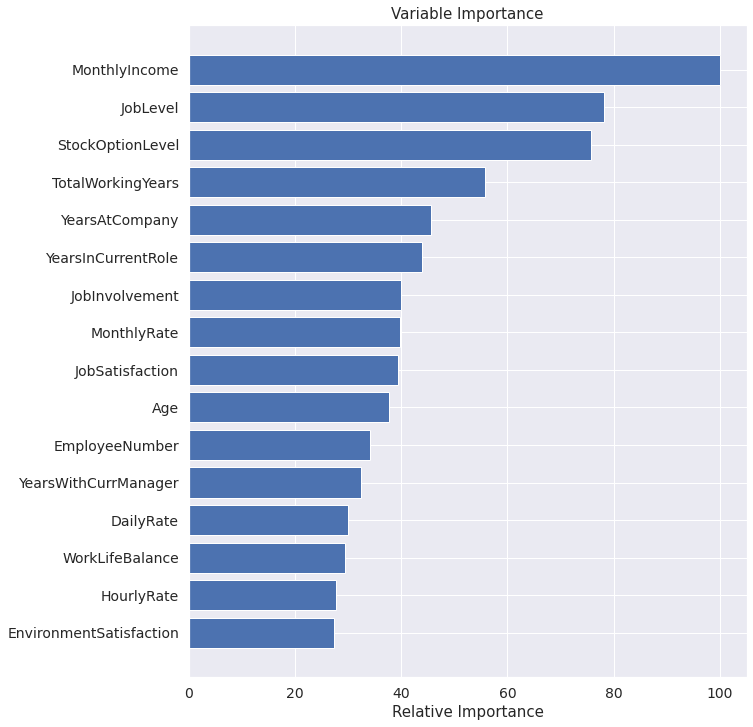

In [29]:
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance/ feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 50:]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xticks(size =14)
plt.yticks(pos, X.columns[sorted_idx], size =14)
plt.xlabel('Relative Importance', fontsize = 15)
plt.title('Variable Importance', fontsize = 15)
plt.show()

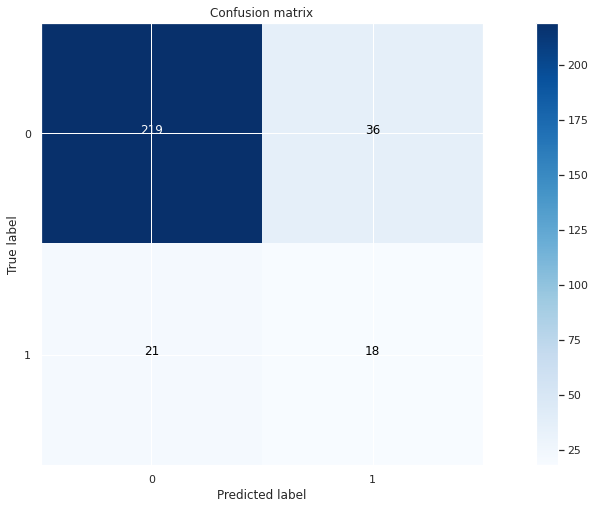

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = best_model.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

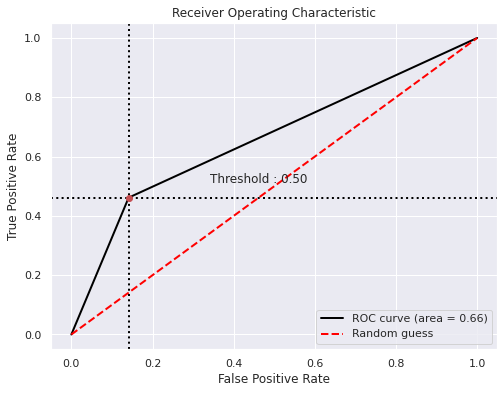

In [31]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(8,6))
bc.plot_roc_curve()
plt.show()

In [32]:
print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("The recall is {:.2f}".format(recall_score(y_test, y_pred)))
print("The precision is {:.2f}".format(precision_score(y_test, y_pred)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, y_pred)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))

The accuracy is 0.81
The balanced accuracy is 0.66
The recall is 0.46
The precision is 0.33
The F1 Score is 0.39
The AUC ROC Score is 0.66


# Logistic Regression

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

params = {
        'solver': ['newton-cg', 'liblinear'],
        'penalty': ['l2'],
        'C': np.logspace(-4,4,50)
}

In [35]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="f1")

In [36]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='f1', verbose=1)

In [37]:
best_model = grid_search.best_estimator_

In [38]:
best_model

LogisticRegression(C=11.513953993264458, solver='liblinear')

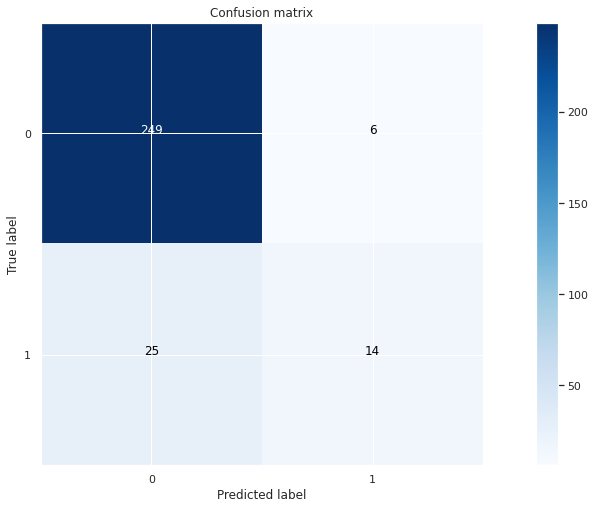

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = best_model.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

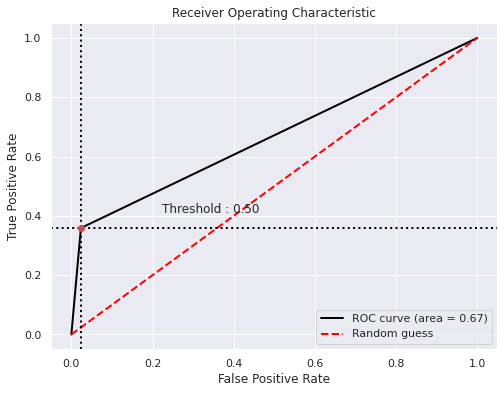

In [40]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(8,6))
bc.plot_roc_curve()
plt.show()

In [41]:
print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("The recall is {:.2f}".format(recall_score(y_test, y_pred)))
print("The precision is {:.2f}".format(precision_score(y_test, y_pred)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, y_pred)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))

The accuracy is 0.89
The balanced accuracy is 0.67
The recall is 0.36
The precision is 0.70
The F1 Score is 0.47
The AUC ROC Score is 0.67
